Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt


In [1]:
# Bancassurance Data Science Project: Predicting Propensity to Buy Insurance

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [9]:
# Step 2: Load Data (Replace with your actual file path or database connection)
data = pd.read_csv('bank.csv',delimiter=";")

In [11]:
# Step 3: Basic EDA
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [13]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [18]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


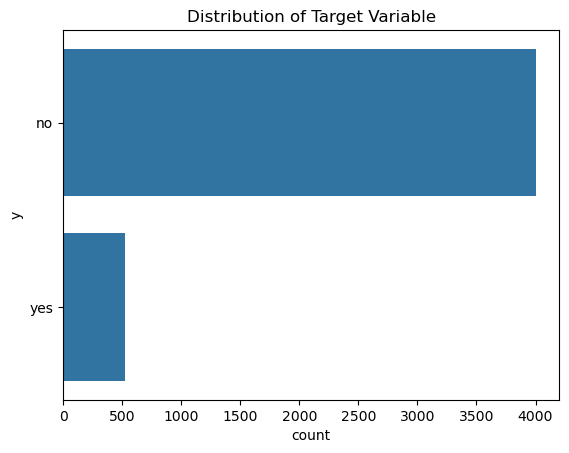

In [20]:
sns.countplot(data['y'])
plt.title('Distribution of Target Variable')
plt.show()

In [22]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:
# Analyze class distribution
class_counts = data['y'].value_counts()
print("Class Distribution:\n", class_counts)
print("\nClass Proportions:\n", class_counts / len(data))

Class Distribution:
 y
no     4000
yes     521
Name: count, dtype: int64

Class Proportions:
 y
no     0.88476
yes    0.11524
Name: count, dtype: float64


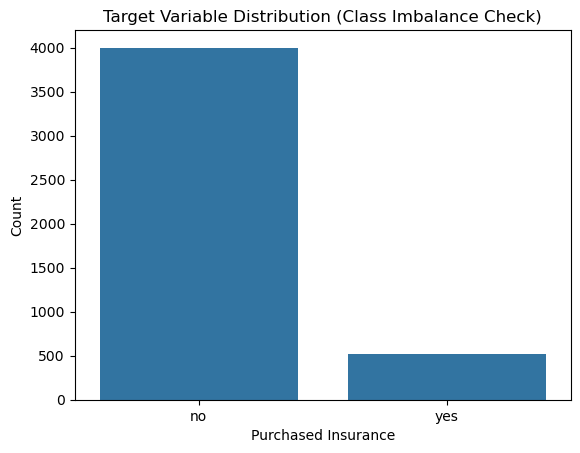

In [26]:
sns.countplot(x='y', data=data)
plt.title('Target Variable Distribution (Class Imbalance Check)')
plt.xlabel('Purchased Insurance')
plt.ylabel('Count')
plt.show()

In [30]:
# Step 4: Data Preprocessing
# Encode categorical variables
label_encoders = {}
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [32]:
# Feature Scaling
features = data.drop(['y'], axis=1)
target = data['y']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [34]:
# Step 4A: Handle Class Imbalance (Optional but Recommended)
# Combine scaled features and target for resampling
Xy = pd.DataFrame(X_scaled, columns=features.columns)
Xy['y'] = target.values

# Separate majority and minority classes
majority = Xy[Xy['y'] == 0]
minority = Xy[Xy['y'] == 1]

# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True, 
                              n_samples=len(majority), 
                              random_state=42)

# Combine to create balanced dataset
Xy_balanced = pd.concat([majority, minority_upsampled]).reset_index(drop=True)

# Separate back into features and target
X_scaled = Xy_balanced.drop('y', axis=1)
target = Xy_balanced['y']

In [36]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42)

In [38]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5600, 16), (2400, 16), (5600,), (2400,))

In [42]:
# Step 6: Logistic Regression (Baseline Model)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print("\n[Logistic Regression] Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\n[Logistic Regression] Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("\n[Logistic Regression] ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))


[Logistic Regression] Confusion Matrix:
[[984 222]
 [270 924]]

[Logistic Regression] Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1206
           1       0.81      0.77      0.79      1194

    accuracy                           0.80      2400
   macro avg       0.80      0.79      0.79      2400
weighted avg       0.80      0.80      0.79      2400


[Logistic Regression] ROC AUC Score: 0.8704606504051489


###### Step 7: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [46]:
# Step 8: Model Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [48]:
print("\n[Random Forest] Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n[Random Forest] Classification Report:")
print(classification_report(y_test, y_pred))
print("\n[Random Forest] ROC AUC Score:", roc_auc_score(y_test, y_prob))


[Random Forest] Confusion Matrix:
[[1139   67]
 [   0 1194]]

[Random Forest] Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1206
           1       0.95      1.00      0.97      1194

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400


[Random Forest] ROC AUC Score: 0.999866316102347


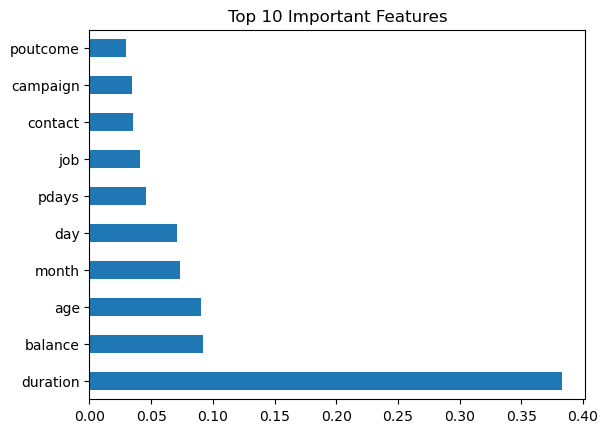

In [50]:
# Step 9: Feature Importance
importances = pd.Series(model.feature_importances_, index=features.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

In [ ]:
# Step 6: Model Training using LightGBM
import lightgbm as lgb

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define the parameters for LGBM
params = {
    'objective': 'binary',   # Binary classification
    'metric': 'binary_error',  # Error metric for binary classification
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,        # Number of leaves in one tree
    'learning_rate': 0.05,   # Learning rate
    'feature_fraction': 0.9, # Fraction of features to use at each iteration
    'bagging_fraction': 0.8, # Fraction of samples to use at each iteration
    'bagging_freq': 5,       # Frequency of bagging
    'verbose': -1
}

# Train the model
lgbm_model = lgb.train(params, train_data, valid_sets=[test_data], early_stopping_rounds=50)

# Step 7: Model Evaluation
y_pred_lgbm = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
y_pred_lgbm = (y_pred_lgbm >= 0.5).astype(int)  # Convert probabilities to binary labels

print("\nConfusion Matrix (LGBM):")
print(confusion_matrix(y_test, y_pred_lgbm))
print("\nClassification Report (LGBM):")
print(classification_report(y_test, y_pred_lgbm))
print("\nROC AUC Score (LGBM):", roc_auc_score(y_test, y_pred_lgbm))


In [58]:
!pip install lightgbm
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

print("\n[LGBM Classifier] Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))
print("\n[LGBM Classifier] Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("\n[LGBM Classifier] ROC AUC Score:", roc_auc_score(y_test, y_prob_lgb))

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 2.0 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 2.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.3 MB/s eta 0:00:00
[LightGBM] [Info] Number of positive: 2806, number of negative: 2794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501071 -> initscore